# Resolución de ejercicios: Introducción a las redes neuronales artificiales

## Autores: Eduardo Cuadros, Juan Barrera
---

En el siguiente notebook se resolverán los ejercicios planteados en el capítulo de redes neuronales artificiales.

## Punto 2
Con base en la librería tensorflow, descargue el dataset *fashion MNIST*. Haga una clasificación de prendas de vestir.

Primero se importan las librerías necesarias para esta clasificación:
- Tensorflow y keras para el manejo de los modelos de IA y creación de capas de la red.
- Matplotlib.pyplot para la visualización de los resultados en gráficas.
- random para generar números aleatorios.

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random
import numpy as np

Luego cargamos el dataset *fashion MNIST*, el cual esta disponible en la librería de keras. Este dataset lo dividimos en datos de entrenamiento y validación:
- *train_X* son los datos de entrenamiento de entrada
- *train_y* son las etiquetas de los datos de entrenamiento.
- *test_X* son los datos de validación que usaremos para verificar el rendimiento de la red.
- *test_y* son los valores reales de estos datos de validación. Con estos compararemos las predicciones.

También se visualiza una foto del dataset.

Lás imágenes tienen dimensión (28, 28) pixeles


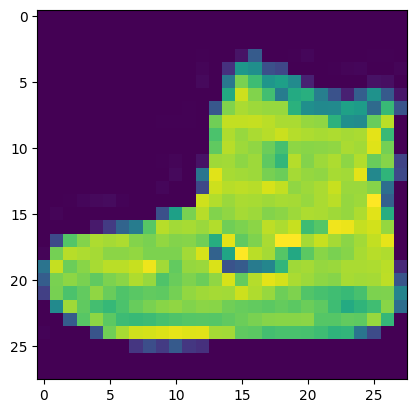

In [7]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()
plt.imshow(train_X[0])
print(f"Lás imágenes tienen dimensión {train_X[0].shape} pixeles")

Como se puede observar, esta imágen es a color. Por lo tanto, es necesario convertir estas imágenes a escala de grises para poder pasarlas por la red. Esto debido a que es más complejo computacionalmente para la red trabajar con las imágenes a color.

In [4]:
train_X = train_X / 255.0
test_X = test_X / 255.0

Lo siguiente que haremos es cdrear el modelo usando Keras, la cual es una librería que facilita la construcción de las capas de la red neuronal de tensorflow.

Para esta red crearemos 3 capas. La primera capa es para aplanar los datos de entrada. Como sabemos, la imágen es un array de dimensión 2 con 28 datos en cada dimensión. La primera capa aplana estos datos a un array de una dimensión con 28x28 datos de entrada. Es decir, con 784 datos. Esto debido a que no trabajaremos con una red neuronal convolucional, sino con una red densa.

La siguiente es una capa densa de 128 neuronas. Cada una de estas neuronas está conectada a todas las neuronas de la capa anterior, por esta razón se llama capa densa. Además tenemos que la función de activación usada es la ReLU. Esta función introduce no linealidad, lo cual es fundamental para que la red pueda aprender patrones complejos.

La siguiente es una capa *Dropout*, la cual tiene como objetivo reducir el sobreajuste durante el entrenamiento, es decir, asegurarnos que la red aprende y no memoriza. Este dropout desactiva aleatoriamente el 20% de las neuronas con cada iteración.

Finalmente tenemos la capa de salida, la cual es la que nos dice qué clasificación tiene la prenda de vestir. La función de activación usada nos muestra la probabilidad convierte los datos de salida en probabilidades. Por lo que cada neurona de salida nos dirá la probabilidad de que la imágen sea de esa categoría.

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Una vez creado el modelo se debe compilar, añadiendo funciones de optimización, la función de perdida que queremos usar para el entrenamiento y el backpropagation, y la metrica que usaremos para verificar el rendimiento. Se usará *cross entropy* como función de coste y *accuracy* como metrica.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Lo siguiente que se hace es entrenar el modelo con las imagenes y etiquetas de entrenamiento. Para este caso, entrenaremos durante 10 epocas.

In [11]:
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6899 - loss: 0.8097
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6992 - loss: 0.7974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7045 - loss: 0.7868
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7062 - loss: 0.7667
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7219 - loss: 0.7529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7296 - loss: 0.7309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7318 - loss: 0.7327
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7377 - loss: 0.7233
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7386 - loss: 0.7177
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7385 - loss: 0.7324


Finalmente lo que hacemos es evaluar el modelo. En este caso tenemos una exactitud de 78.81%.

In [13]:
loss, acc = model.evaluate(test_X, test_y, verbose=2)
print(f"Precisión del modelo en el conjunto de prueba: {acc}")

313/313 - 1s - 3ms/step - accuracy: 0.7881 - loss: 0.6318
Precisión del modelo en el conjunto de prueba: 0.788100004196167


Ahora harémos una predición de una imágen aleatoria. Para esto primero escogemos aleatoriamente un índice del conjunto de prueba y seleccionamos la imágen y etiqueta correspondientes a este índice. Luego hacemos la predicción usando el modelo entrenado. Podemos ver que la imágen es de un bolso, cuya etiqueta es la 8 y la etiqueta predecida también es la 8.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


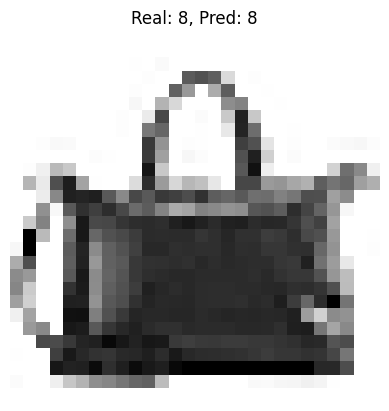

In [22]:
random_index = random.randint(0, len(test_X) - 1)
X = test_X[random_index]
y_real = test_y[random_index]

pred_y = model.predict(np.expand_dims(X, axis=0))
pred_label = np.argmax(pred_y)

plt.imshow(X, cmap=plt.cm.binary)
plt.title(f"Real: {y_real}, Pred: {pred_label}")
plt.axis('off')
plt.show()